<a href="https://colab.research.google.com/github/RitaDCassia/CNN/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip uninstall -y tensorflow

Found existing installation: tensorflow 2.15.0
Uninstalling tensorflow-2.15.0:
  Successfully uninstalled tensorflow-2.15.0


In [ ]:
#fazendo a instalação do tensorflow
!pip install tensorflow-gpu==2.8.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 497.6/497.6 MB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 53.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.5/462.5 kB 24.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 30.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 36.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 40.7 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
  Attempting uninstall: tensorboard-data-server
    Found existing installation: tensorboard-data-server 0.7.2
    Uninstalling tensorboard-data-server-0.7.2:
      Successfully uninstalled tensorboard-data-server-0.7.2
  Attempting uninstall: google-auth-oauthlib
    Found existing 

In [ ]:
from ast import increment_lineno
# importando bibliotecas nescessárias
import tensorflow as tf
import matplotlib.pyplot as plt

# dataset keras
from tensorflow.keras.datasets import cifar10

# permite visualização das imagens
%matplotlib inline
# versao do tf
tf.__version__

'2.8.0'

link da base de dados:
https://www.cs.toronto.edu/~kriz/cifar.html

Vamos fazer a identificação de aviao, automovel etc..
Temos 10 classes
60.000 imagens para o treinamento de imagens 32x32, ou seja imagens de 1024 pixels para o treinamento, porém vale lembrar que são imagens coloridas, então elas tem canais RGB. sendo assim, temos que multiplicar 1024 por 3 que são os tres canais, por fim teremos 3072 entradas para essa rede neural.

In [ ]:
#classes que serão previstas
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [ ]:
# carregamento da base de dados
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 3s 0us/step






**normalização das imagens**

In [ ]:
# mostra três Colchete pq as imagens estão em tres canais rgb
X_train[1]

array([[[154, 177, 187],
        [126, 137, 136],
        [105, 104,  95],
        ...,
        [ 91,  95,  71],
        [ 87,  90,  71],
        [ 79,  81,  70]],

       [[140, 160, 169],
        [145, 153, 154],
        [125, 125, 118],
        ...,
        [ 96,  99,  78],
        [ 77,  80,  62],
        [ 71,  73,  61]],

       [[140, 155, 164],
        [139, 146, 149],
        [115, 115, 112],
        ...,
        [ 79,  82,  64],
        [ 68,  70,  55],
        [ 67,  69,  55]],

       ...,

       [[175, 167, 166],
        [156, 154, 160],
        [154, 160, 170],
        ...,
        [ 42,  34,  36],
        [ 61,  53,  57],
        [ 93,  83,  91]],

       [[165, 154, 128],
        [156, 152, 130],
        [159, 161, 142],
        ...,
        [103,  93,  96],
        [123, 114, 120],
        [131, 121, 131]],

       [[163, 148, 120],
        [158, 148, 122],
        [163, 156, 133],
        ...,
        [143, 133, 139],
        [143, 134, 142],
        [143, 133, 144]]

In [ ]:
X_train = X_train / 255.0

In [ ]:
# aqui ja temos na escala de 255
X_train[1]

array([[[0.60392157, 0.69411765, 0.73333333],
        [0.49411765, 0.5372549 , 0.53333333],
        [0.41176471, 0.40784314, 0.37254902],
        ...,
        [0.35686275, 0.37254902, 0.27843137],
        [0.34117647, 0.35294118, 0.27843137],
        [0.30980392, 0.31764706, 0.2745098 ]],

       [[0.54901961, 0.62745098, 0.6627451 ],
        [0.56862745, 0.6       , 0.60392157],
        [0.49019608, 0.49019608, 0.4627451 ],
        ...,
        [0.37647059, 0.38823529, 0.30588235],
        [0.30196078, 0.31372549, 0.24313725],
        [0.27843137, 0.28627451, 0.23921569]],

       [[0.54901961, 0.60784314, 0.64313725],
        [0.54509804, 0.57254902, 0.58431373],
        [0.45098039, 0.45098039, 0.43921569],
        ...,
        [0.30980392, 0.32156863, 0.25098039],
        [0.26666667, 0.2745098 , 0.21568627],
        [0.2627451 , 0.27058824, 0.21568627]],

       ...,

       [[0.68627451, 0.65490196, 0.65098039],
        [0.61176471, 0.60392157, 0.62745098],
        [0.60392157, 0

In [ ]:
X_train.shape #50k imagens de 32x32 e os valores de rgb 3

(50000, 32, 32, 3)

In [ ]:
# fazendo o mesmo para as imagens de teste
X_test = X_test / 255.0

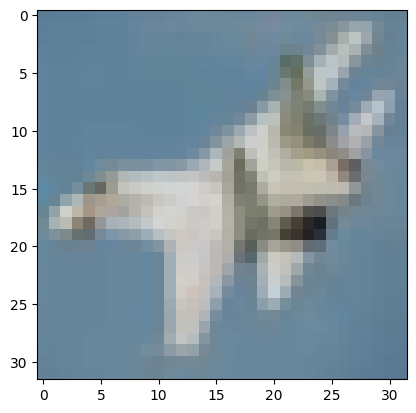

In [ ]:
# visualizando imagem de teste
plt.imshow(X_test[10])

Construindo a rede neural convolucional

In [ ]:
# definindo um modelo
model = tf.keras.models.Sequential()

**Adicionando primeira camada de convolução**

Hyper-parâmetros:
*   filters=32 : filtros
*   kernel_size=3 : tamanho do kernel 3 (tamanho da matriz 3x3)
*   padding="same" : preenchimento
*   activation="relu" : função de ativação
*   input_shape=[32, 32, 3] = camadas de entrada

In [ ]:
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu", input_shape=[32, 32, 3]))

**Adicionando segunda camada de convolução**

Hyper-parâmetros da camada de convolução:

*   filters = 32 : filtros
*   kernel_size=3 : matriz 3x3 tamanho do kernel 3
*   padding="same" : preenchimento
*   activation="relu" : função de ativação

Hyper-parâmetros da camada de mac-pooling:

*   pool_size=2 : matriz 2x2
*   strides=2 : indica quanto essa matriz anda, anda 2 para calcular o proximo
*   padding="valid" : não utiliza a ultima coluna da matriz



In [ ]:
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu"))

In [ ]:
# ideia de buscar sempre o valor maior
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding="valid"))

**Adicionando terceira camada de convolução**

Hyper-parêmetros:
* filters=64
* kernel_size=3
* padding="same"
* activation="relu"




In [ ]:
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"))

**Adicionando quarta camada de convolução e camada de max pooling**

In [ ]:
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"))

In [ ]:
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding="valid"))

**Adicionando camada de flatten**

In [ ]:
model.add(tf.keras.layers.Flatten())

**Adicionando a primeira camada densa (fully-connected)**

In [ ]:
model.add(tf.keras.layers.Dense(units=128, activation="relu"))

**Adicionando camda de saída**

**Adicionando a camada de saída**

Hyper-parãmetros:
* units=10 : neuronios (numero de classes)
* activation="softmax" : quando temos mais de duas classes

In [ ]:
model.add(tf.keras.layers.Dense(units=10, activation="softmax"))

In [ ]:
model.summary() # estrutura da rede neural

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                    

**Compilando modelo**

In [ ]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="Adam", metrics="sparse_categorical_accuracy")

**Treinamento do modelo**

In [ ]:
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 321s 205ms/step - loss: 1.3665 - sparse_categorical_accuracy: 0.5072
Epoch 2/10
1563/1563 [==============================] - 317s 203ms/step - loss: 0.9164 - sparse_categorical_accuracy: 0.6756
Epoch 3/10
1563/1563 [==============================] - 321s 205ms/step - loss: 0.7449 - sparse_categorical_accuracy: 0.7390
Epoch 4/10
1563/1563 [==============================] - 312s 200ms/step - loss: 0.6249 - sparse_categorical_accuracy: 0.7819
Epoch 5/10
1563/1563 [==============================] - 319s 204ms/step - loss: 0.5280 - sparse_categorical_accuracy: 0.8158
Epoch 6/10
1563/1563 [==============================] - 314s 201ms/step - loss: 0.4402 - sparse_categorical_accuracy: 0.8452
Epoch 7/10
1563/1563 [==============================] - 315s 201ms/step - loss: 0.3659 - sparse_categorical_accuracy: 0.8696
Epoch 8/10
1563/1563 [==============================] - 315s 202ms/step - loss: 0.2928 - sparse_categorical_accuracy: 0.8954


**Avaliando modelo**

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

313/313 [==============================] - 16s 50ms/step - loss: 1.1921 - sparse_categorical_accuracy: 0.7366


In [ ]:
print("Accuracy: {}".format(test_accuracy))

Accuracy: 0.7365999817848206


In [ ]:
print("Loss: {}".format(test_loss))

Loss: 1.1920543909072876
